<a href="https://colab.research.google.com/github/JorgeMatteoda/portfolio/blob/main/Unsupervised_Patient_Segmentation_and_Anomaly_Detection_in_Chronic_Disease_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Patient Segmentation and Anomaly Detection in Chronic Disease Data
Segmentación y detección de anomalías en pacientes crónicos
**Objetivo.** Aplicar técnicas avanzadas de aprendizaje no supervisado para identificar grupos de pacientes con condiciones clínicas similares, visualizar dichos segmentos en espacios de baja dimensión, detectar perfiles atípicos y analizar comparativamente distintos métodos de agrupamiento. Los estudiantes implementarán modelos de clustering como K-Means, DBSCAN o jerárquicos, emplearán técnicas de reducción de dimensionalidad como PCA o t-SNE para representar los resultados, y justificarán sus decisiones en función del contexto clínico y los resultados obtenidos.

**Contexto.**
Estás colaborando con un centro de atención primaria enfocado en pacientes con enfermedades crónicas como diabetes, hipertensión y obesidad. El objetivo es segmentar automáticamente a los pacientes según sus patrones clínicos y detectar casos atípicos que podrían representar errores, diagnósticos tardíos o condiciones emergentes.
El equipo de salud quiere visualizar agrupamientos naturales de pacientes y destacar los que se alejan del comportamiento común, sin usar etiquetas médicas directas. Para eso, debes aplicar técnicas no supervisadas de clustering y reducción de dimensionalidad.

#1. Preprocesamiento y reducción de dimensionalidad

*   Escala los datos.


In [ ]:
import pandas as pd
import kagglehub

# https://www.kaggle.com/datasets/mathchi/diabetes-data-set
# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")
df = pd.read_csv(path+"/diabetes.csv")
print(df.head())

# Definir variables
X = df.drop(columns=["Outcome"], axis = 1)
y = df["Outcome"]

# Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


*   Aplica PCA, T-SNE y UMAP (al menos dos) y analiza su  utilidad visual.

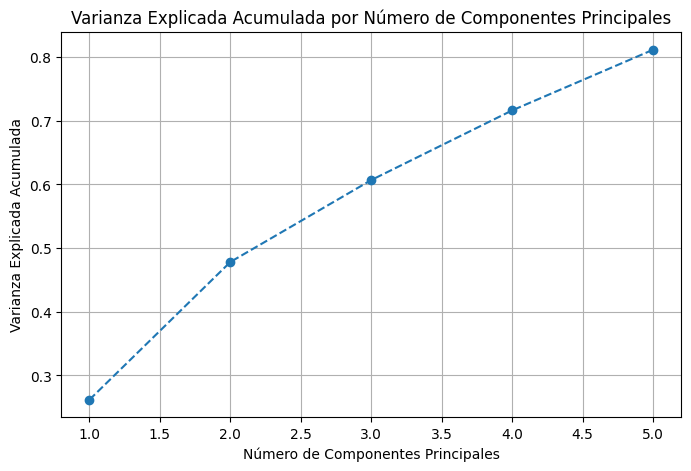

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Aplicar PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Calcula la varianza explicada acumulada
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Grafica la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Número de Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

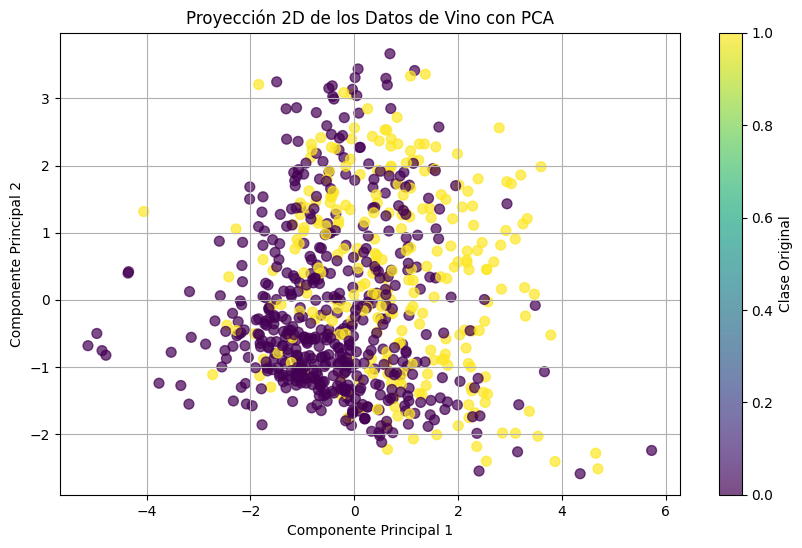

In [ ]:
# Visualiza los resultados en 2D con matplotlib y colorea por clase original
# Opcional: Aplicar PCA con 2 componentes para visualización en 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('Proyección 2D de los datos de diabetes con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Clase Original')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


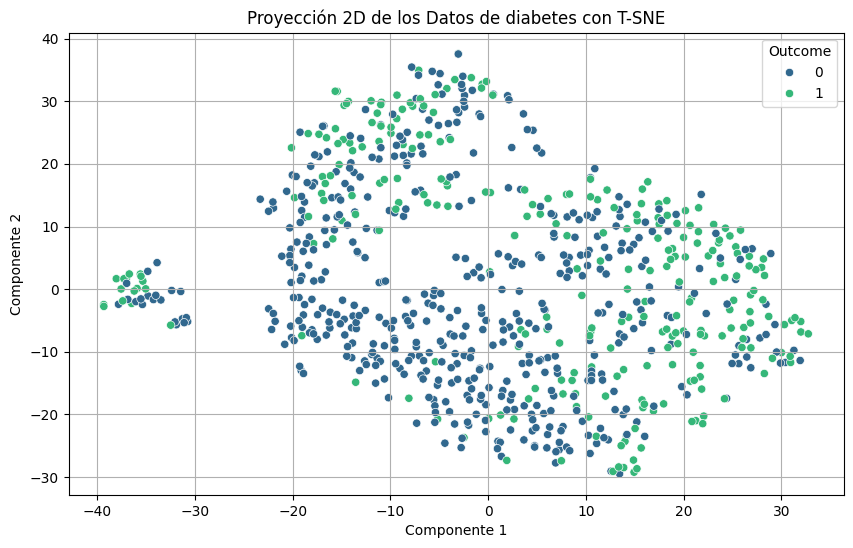

In [ ]:
# Aplicar T-SNE
from sklearn.manifold import TSNE
import seaborn as sns
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', legend = 'full')
plt.title('Proyección 2D de los Datos de diabetes con T-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.show()

Ambos graficos no muestran una heterogeneidad clara. T-SNE muestra los datos menos condensados que PCA.

# 2. Segmentación (clustering)
* Aplica DBSCAN y HDBSCAN.


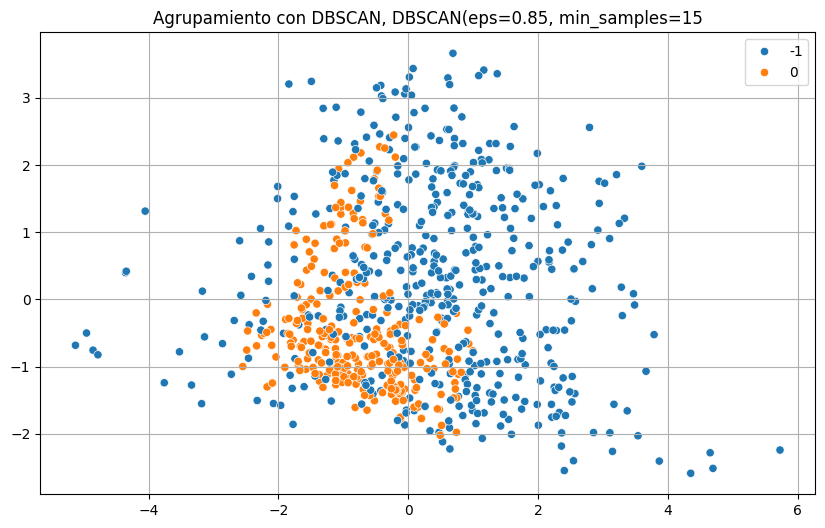

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import hdbscan

dbscan_model = DBSCAN(eps=0.85, min_samples=15)
dbscan_labels = dbscan_model.fit_predict(X_pca)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='tab10', legend='full')
plt.title('Agrupamiento con DBSCAN, DBSCAN(eps=0.85, min_samples=15')
plt.grid(True)
plt.show()

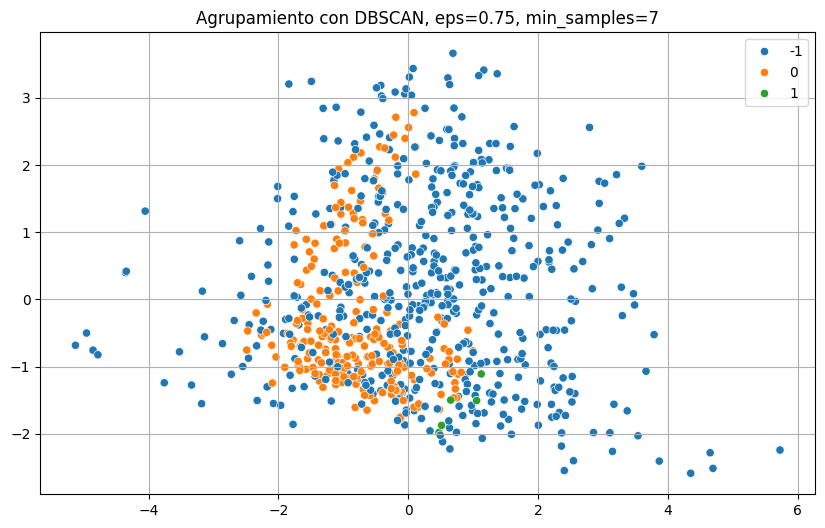

In [ ]:
dbscan_model = DBSCAN(eps=0.75, min_samples=10)
dbscan_labels = dbscan_model.fit_predict(X_pca)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='tab10', legend='full')
plt.title('Agrupamiento con DBSCAN, eps=0.75, min_samples=7')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


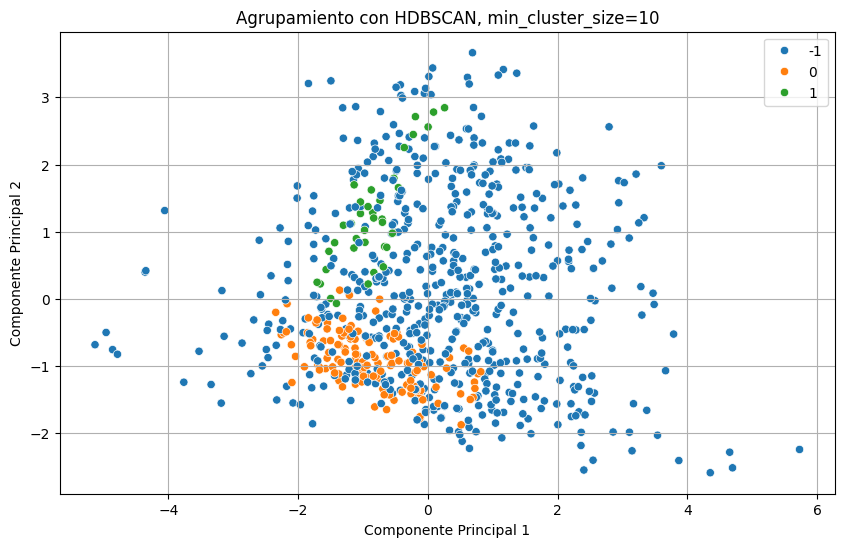

In [ ]:
hdb_model = hdbscan.HDBSCAN(min_cluster_size=10)
hdb_labels = hdb_model.fit_predict(X_pca)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hdb_labels, palette='tab10', legend='full')
plt.title('Agrupamiento con HDBSCAN, min_cluster_size=10')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

* Visualiza los clústeres y evalúa su calidad (Índice de Silueta, Davies-Bouldin).

In [ ]:
import numpy as np

mask = dbscan_labels != -1
if len(np.unique(dbscan_labels[mask])) > 1:
  sil_score = silhouette_score(X_pca[mask], dbscan_labels[mask])
  dav_score = davies_bouldin_score(X_pca[mask], dbscan_labels[mask])
  print(f"DBSCAN, Silhouette Score: {sil_score}")
  print(f"DBSCAN, Davies-Bouldin Score: {dav_score}")
else:
  print("No se detectaron suficientes clusteres para evaluar la silueta")

DBSCAN, Silhouette Score: 0.18477382516087276
DBSCAN, Davies-Bouldin Score: 0.863967228450755


In [ ]:
mask_hdb = hdb_labels != -1
if len(np.unique(hdb_labels[mask_hdb])) > 1:
  sil_score = silhouette_score(X_pca[mask_hdb], hdb_labels[mask_hdb])
  dav_score = davies_bouldin_score(X_pca[mask_hdb], hdb_labels[mask_hdb])
  print(f"HDBSCAN, Silhouette Score: {sil_score}")
  print(f"HDBSCAN, Davies-Bouldin Score: {dav_score}")
else:
  print("No se detectaron suficientes clusteres para evaluar la silueta")

HDBSCAN, Silhouette Score: 0.4380211888963464
HDBSCAN, Davies-Bouldin Score: 0.8734734172150026


**Silhouette Score.** Es mejor en HDBSCAN (.44) que en PCA (.18) esto indica que los clústeres están mejor separados y los puntos son más cohesivos.

**Davies-Bouldin Score.** Aunque son casi iguales. Sobre las leves diferencias se puede decir que: DBSCAN tiene un menor valor lo que significa que tiene un mejor clustering. De forma que HDBSCAN ha sido menos efectivo al crear grupos compactos y bien separados.


# 3. Detección de anomalías
* Aplica Isolation Forest y One-Class SVM.
* Muestra qué pacientes son considerados atípicos por cada técnica.

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Aplicar Isolation Forest
# n_estimators: número de árboles en el bosque
# contamination: proporción esperada de valores atípicos en el conjunto de datos
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
outliers_iso_forest = iso_forest.fit_predict(X_scaled)

# Los valores atípicos se marcan como -1, los puntos normales como 1
atypical_indices_iso_forest = np.where(outliers_iso_forest == -1)[0]

print("Índices de pacientes considerados atípicos por Isolation Forest:")
print(atypical_indices_iso_forest)

# Opcional: Mostrar los datos de los pacientes atípicos
print("\nDatos de pacientes atípicos (Isolation Forest):")
display(X.iloc[atypical_indices_iso_forest])

Índices de pacientes considerados atípicos por Isolation Forest:
[  4   7   8   9  12  13  15  28  39  43  45  49  53  56  57  58  60  67
  75  78  81  84  86 111 120 125 153 154 159 172 177 186 193 206 215 220
 221 222 228 231 243 245 247 254 258 259 261 266 269 286 294 300 319 323
 332 336 349 357 362 370 371 375 395 408 409 415 426 430 435 445 453 455
 456 458 459 468 484 486 487 489 494 498 502 519 522 533 537 546 549 561
 579 584 589 593 601 604 606 612 619 622 643 655 658 661 662 672 673 674
 684 691 695 697 703 706 715 744 753 759 763]

Datos de pacientes atípicos (Isolation Forest):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137,40,35,168,43.1,2.288,33
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54
12,10,139,80,0,0,27.1,1.441,57
...,...,...,...,...,...,...,...,...
715,7,187,50,33,392,33.9,0.826,34
744,13,153,88,37,140,40.6,1.174,39
753,0,181,88,44,510,43.3,0.222,26
759,6,190,92,0,0,35.5,0.278,66


# 4. Análisis cruzado
* ¿Coinciden las anomalías con clústeres raros?
* ¿Qué técnica dio resultados más interpretables?

In [ ]:
from sklearn.svm import OneClassSVM

# Aplicar One-Class SVM
# nu: una estimación de la fracción de valores atípicos y un límite superior para la fracción de vectores de soporte
# kernel: tipo de kernel a usar (rbf es común para datos no lineales)
oc_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma='auto') # nu=0.1 as an example, can be tuned
outliers_oc_svm = oc_svm.fit_predict(X_scaled)

# Los valores atípicos se marcan como -1, los puntos normales como 1
atypical_indices_oc_svm = np.where(outliers_oc_svm == -1)[0]

print("Índices de pacientes considerados atípicos por One-Class SVM:")
print(atypical_indices_oc_svm)

# Opcional: Mostrar los datos de los pacientes atípicos
print("\nDatos de pacientes atípicos (One-Class SVM):")
display(X.iloc[atypical_indices_oc_svm])

Índices de pacientes considerados atípicos por One-Class SVM:
[  4   7   8   9  12  13  45  49  58  60  75  78  81  86 102 106 125 129
 145 159 177 182 186 193 220 228 247 254 258 268 273 294 300 303 319 332
 342 349 357 362 370 371 392 409 426 445 453 455 459 487 489 502 518 522
 537 549 579 584 593 596 604 621 622 655 661 673 684 691 695 706 728 753]

Datos de pacientes atípicos (One-Class SVM):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137,40,35,168,43.1,2.288,33
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54
12,10,139,80,0,0,27.1,1.441,57
...,...,...,...,...,...,...,...,...
691,13,158,114,0,0,42.3,0.257,44
695,7,142,90,24,480,30.4,0.128,43
706,10,115,0,0,0,0.0,0.261,30
728,2,175,88,0,0,22.9,0.326,22


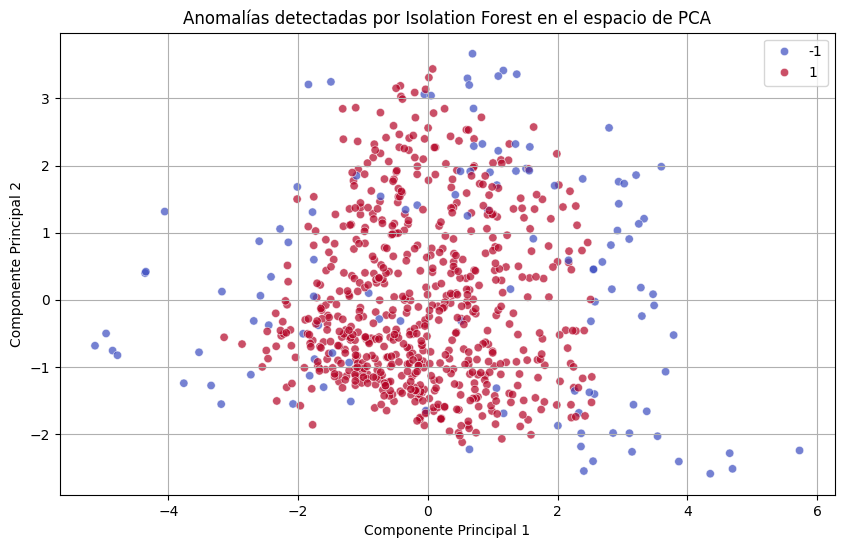

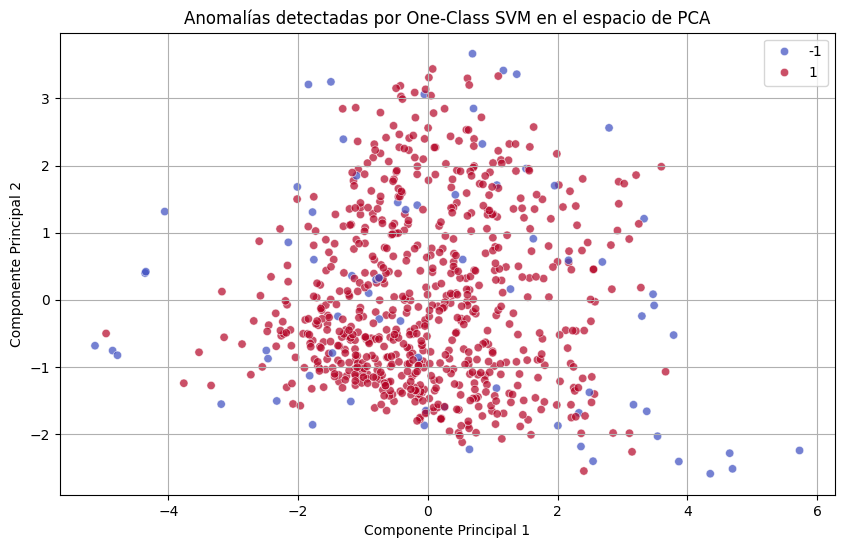

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualizar anomalías de Isolation Forest en el espacio de PCA
plt.figure(figsize=(10, 6))
# Usamos el resultado de fit_predict directamente, donde -1 son anomalías y 1 son normales
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=outliers_iso_forest, palette='coolwarm', legend='full', alpha=0.7)
plt.title('Anomalías detectadas por Isolation Forest en el espacio de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Visualizar anomalías de One-Class SVM en el espacio de PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=outliers_oc_svm, palette='coolwarm', legend='full', alpha=0.7)
plt.title('Anomalías detectadas por One-Class SVM en el espacio de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

**Análisis de la coincidencia de anomalías con clústeres raros:**

*   **DBSCAN y HDBSCAN:** Estos algoritmos identifican clústeres densos y marcan los puntos que no pertenecen a ningún clúster denso como ruido (etiqueta -1). Estos puntos de ruido podrían considerarse clústeres "raros" o aislados.
*   **Isolation Forest y One-Class SVM:** Estas técnicas buscan puntos que se desvían del comportamiento general de la mayoría de los datos.

Tienden a coincider las anomalías con clusteres raros (ruido: -1). Tanto HDBSCAN Y DBSCAN son mas sensibles a ubicar outliers frente a los metodos para hallar anomalías.

**¿Qué técnica dio resultados más interpretables?**

La interpretabilidad puede variar dependiendo del contexto y de lo que se considere "interpretable". Aquí hay una comparación general:

Gráficamente se puede decir que los métodos para hallar anomalías pueden ser mas interpretables gráficamente ya que los puntos en el perímetro suelen los anómalos.
Para HDBSCAN y DBSCAN es mas dificil hallar un patrón como inferir que son datos fuera de algún clúster, ya que hay algunos en el centro que son marcados como "-1".